In [1]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggpubr)
require(scattermore)
require(viridis)

Loading required package: cowplot

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: data.table

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: scattermore

Loading required package: viridis

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:viridisLite’:

    viridis.map




In [2]:
data_raw = fread("../../data/magnifications_matching/20x_raw.field_thr.all.tsv")
data_clean = fread("../../data/magnifications_matching/20x_raw.field_thr.cleaned.all.tsv")

Warning message:
“Removed 1 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


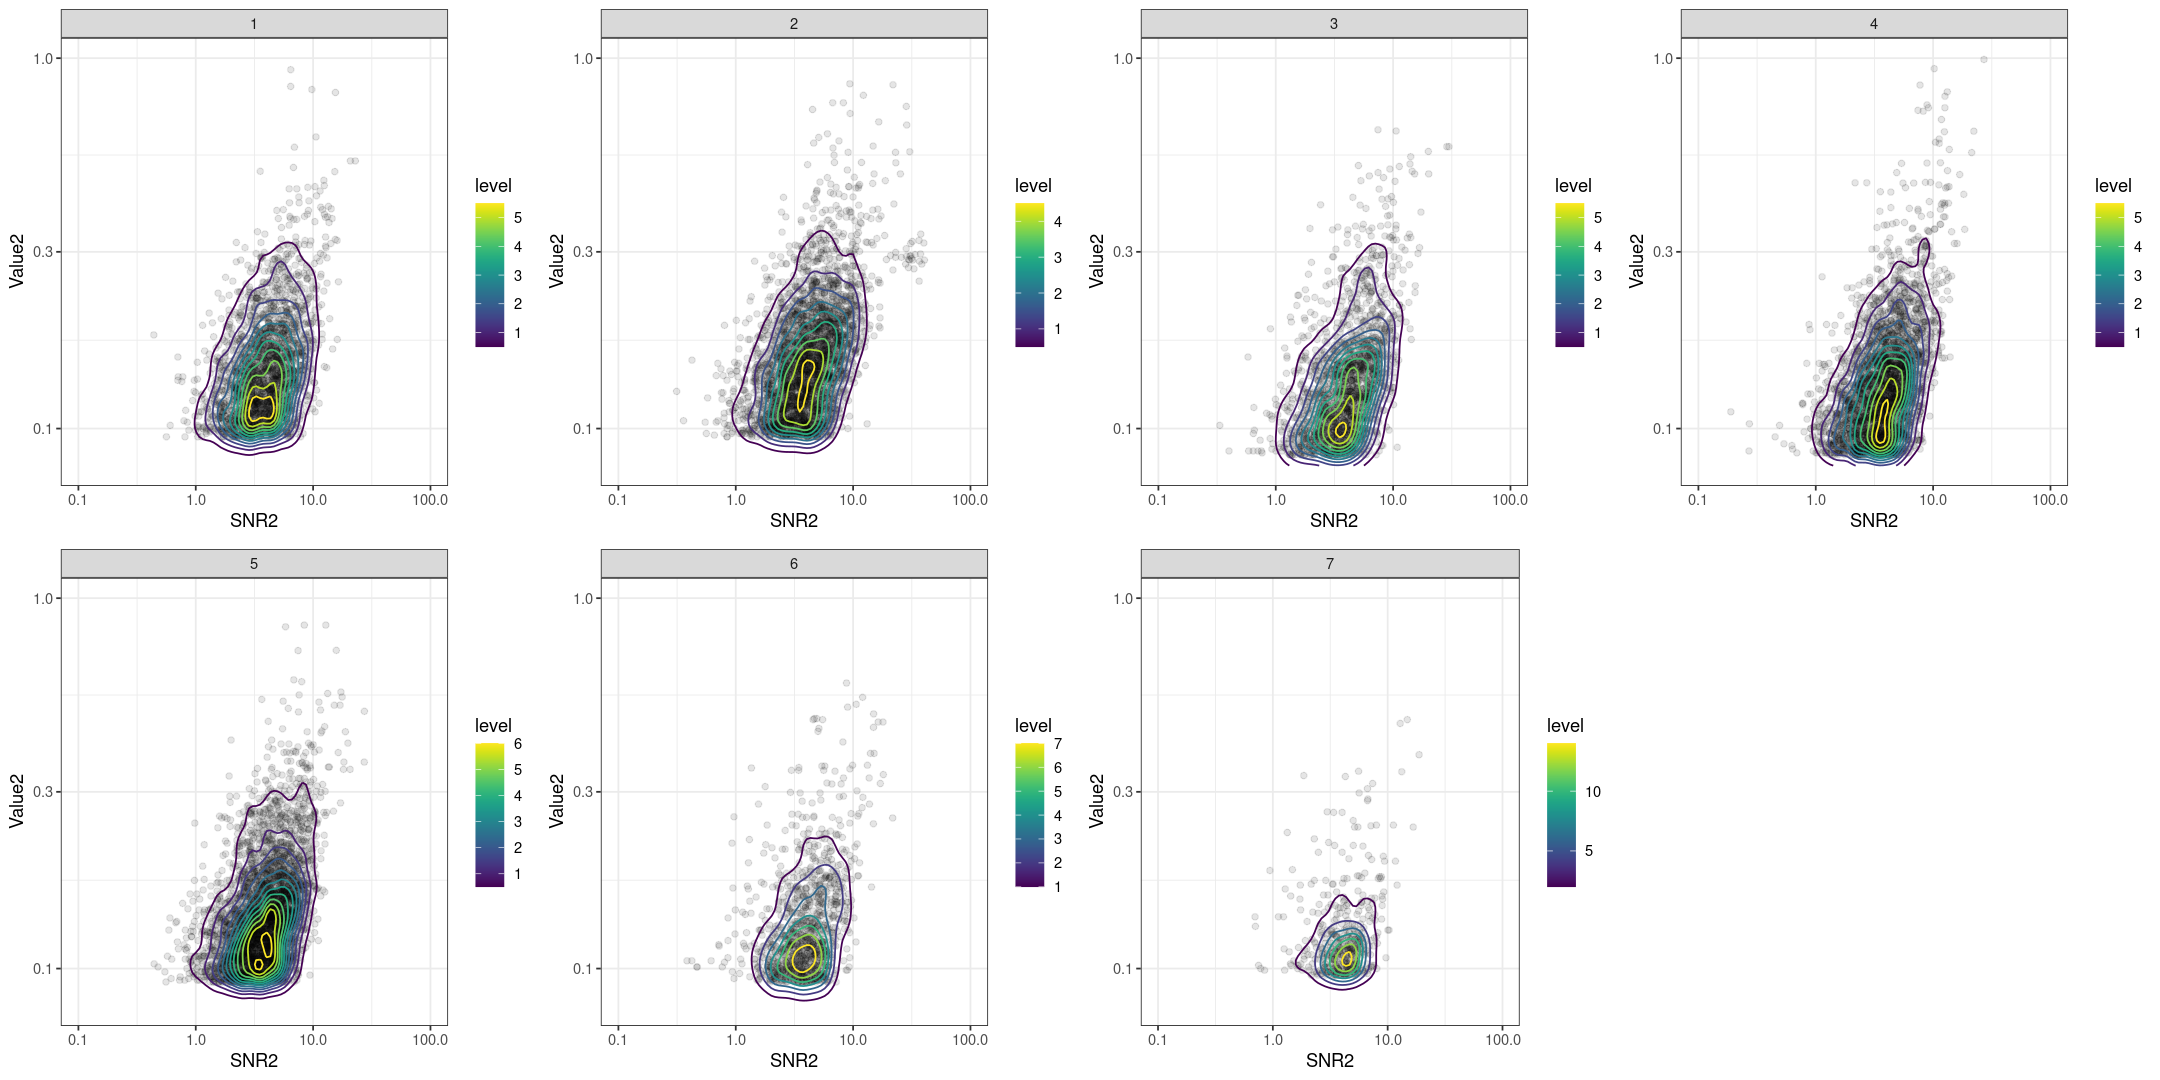

In [3]:
plist = by(data_raw, data_raw$sid, function(field_data) {
    ggplot(field_data, aes(x=SNR2, y=Value2)) + geom_point(alpha=.1) + facet_wrap(~sid) +
        scale_x_log10(limits=c(1e-1, 1e2)) + scale_y_log10(limits=c(10**-1.1, 1)) + theme_bw() +
        geom_density2d(aes(color=..level..)) + scale_color_viridis()
})
options(repr.plot.width=18, repr.plot.height=9)
plot_grid(plotlist=plist, nrow=2)

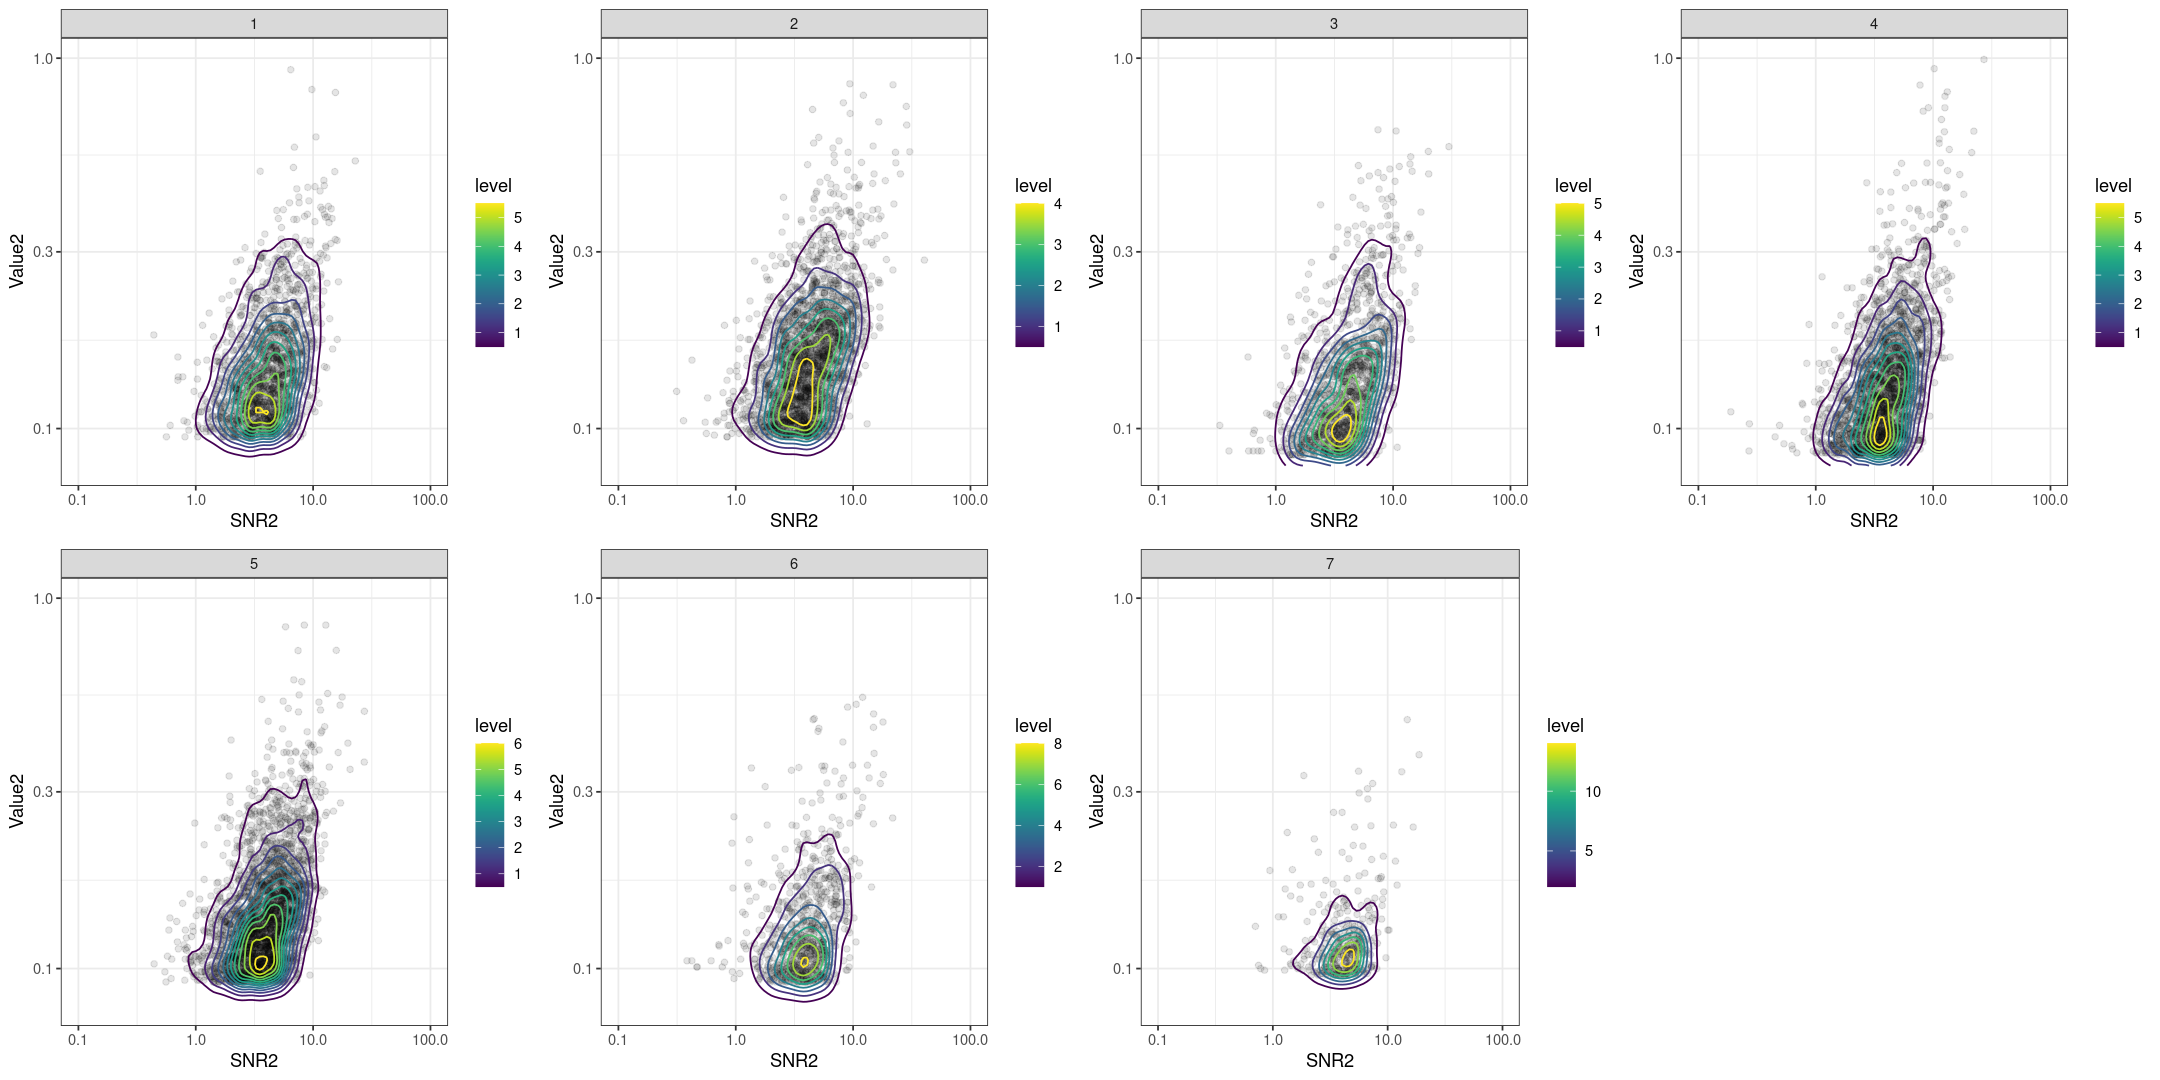

In [4]:
plist = by(data_clean, data_clean$sid, function(field_data) {
    ggplot(field_data, aes(x=SNR2, y=Value2)) + geom_point(alpha=.1) + facet_wrap(~sid) +
        scale_x_log10(limits=c(1e-1, 1e2)) + scale_y_log10(limits=c(10**-1.1, 1)) + theme_bw() +
        geom_density2d(aes(color=..level..)) + scale_color_viridis()
})
options(repr.plot.width=18, repr.plot.height=9)
plot_grid(plotlist=plist, nrow=2)

In [21]:
raw = copy(data_raw[, .(sid, nid, x=as.character(x), y=as.character(y), raw_SNR=SNR, raw_Value=Value2)])
setkeyv(raw, c("sid", "nid", "x", "y"))
clean = copy(data_clean[, .(sid, nid, x=as.character(x), y=as.character(y), clean_SNR=SNR, clean_Value=Value2)])
setkeyv(clean, c("sid", "nid", "x", "y"))

In [25]:
pdata = clean[raw]
head(pdata)

sid,nid,x,y,clean_SNR,clean_Value,raw_SNR,raw_Value
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,13.058,125.864,11.273,0.250,11.273,0.250
1,1,13.09,116.756,9.969,0.222,9.969,0.222
1,1,26.967,127.987,5.638,0.128,5.638,0.128
1,2,12.148,190.986,9.836,0.162,9.836,0.162
1,2,12.988,172.973,12.399,0.282,12.399,0.282
1,2,15.979,165.023,3.152,0.110,3.152,0.110


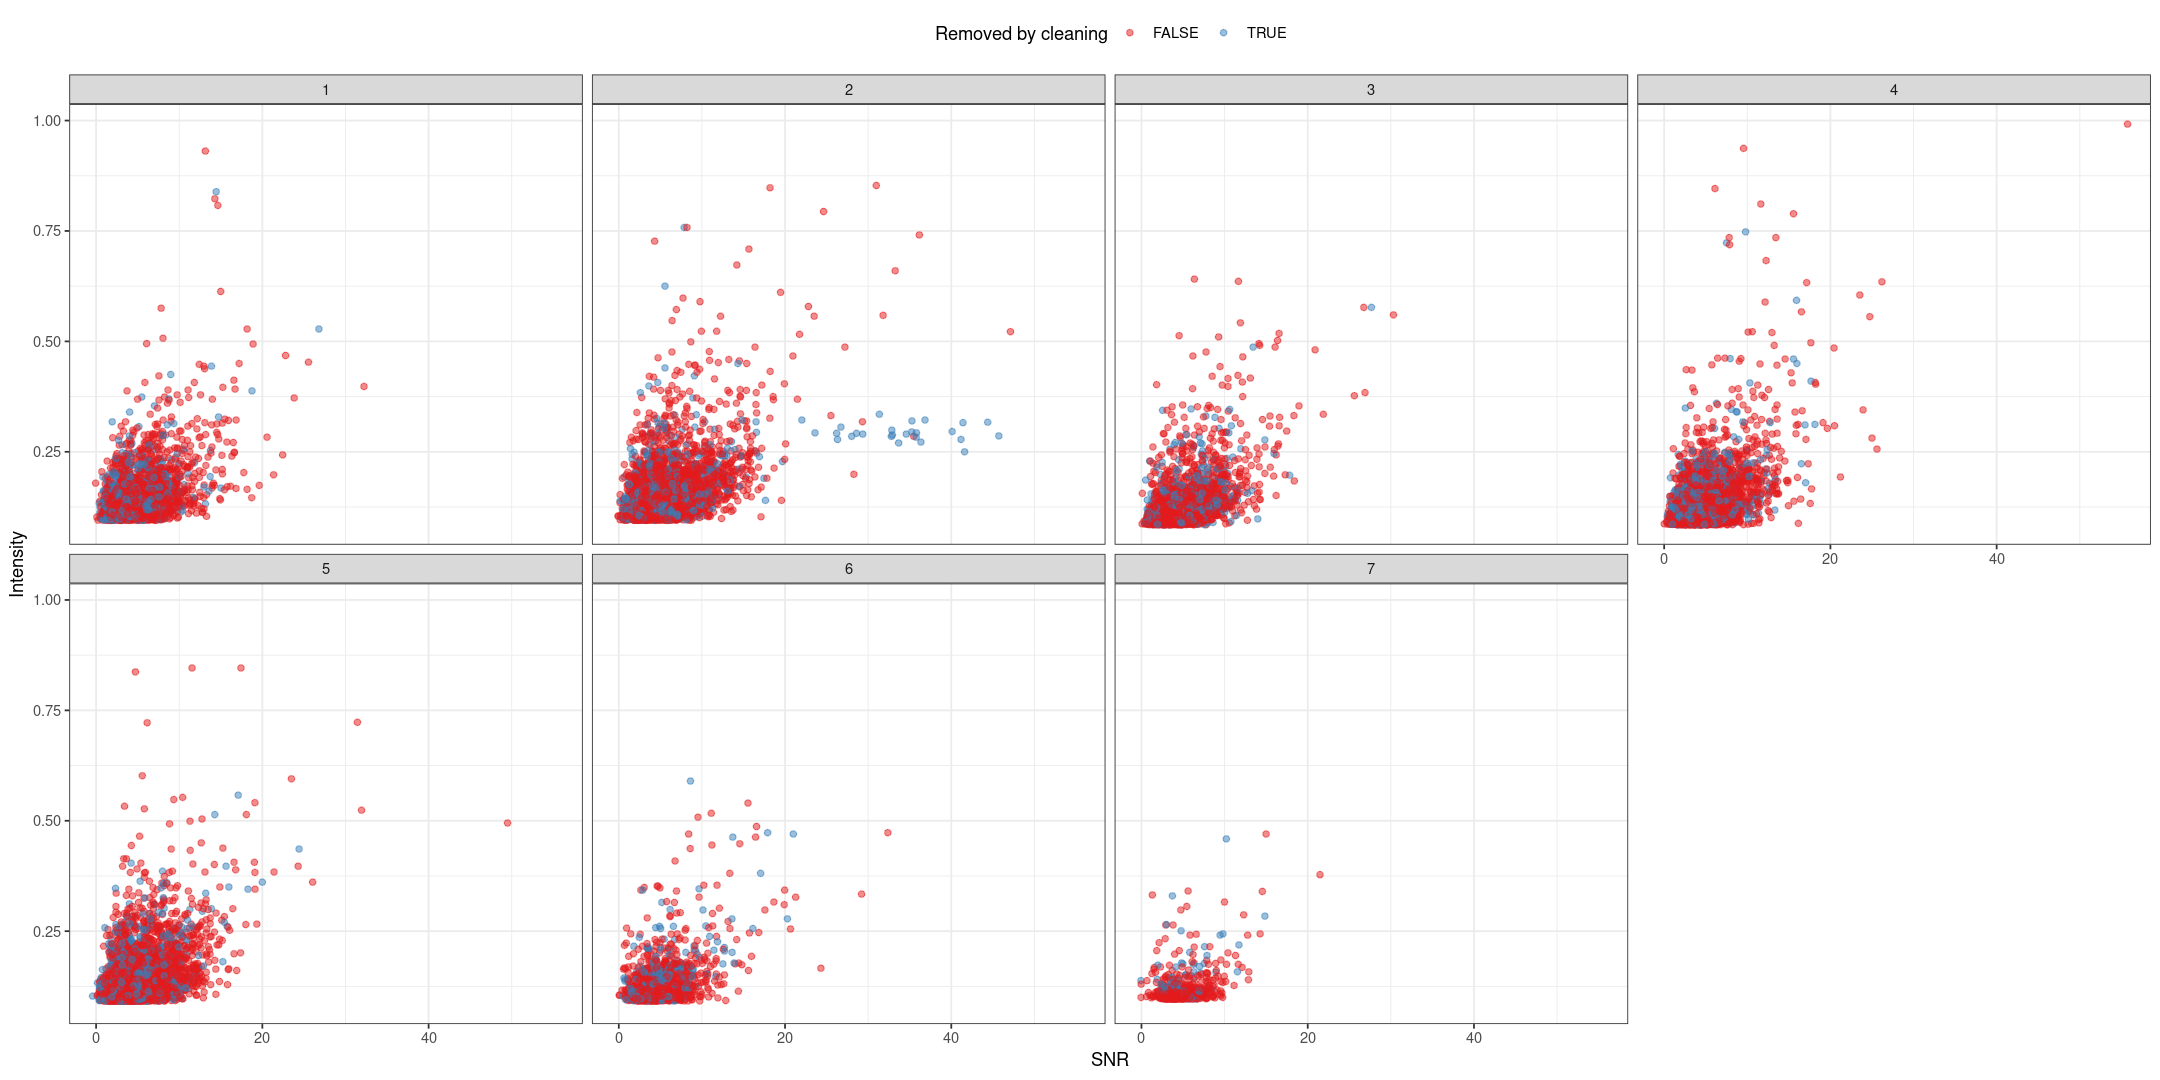

In [33]:
ggplot(pdata, aes(x=raw_SNR, y=raw_Value, color=is.na(clean_SNR))) + geom_point(alpha=.5) +
    facet_wrap(~sid, nrow=2) + scale_color_brewer(palette="Set1") + theme_bw() +
    labs(x="SNR", y="Intensity", color="Removed by cleaning") + theme(legend.position="top")

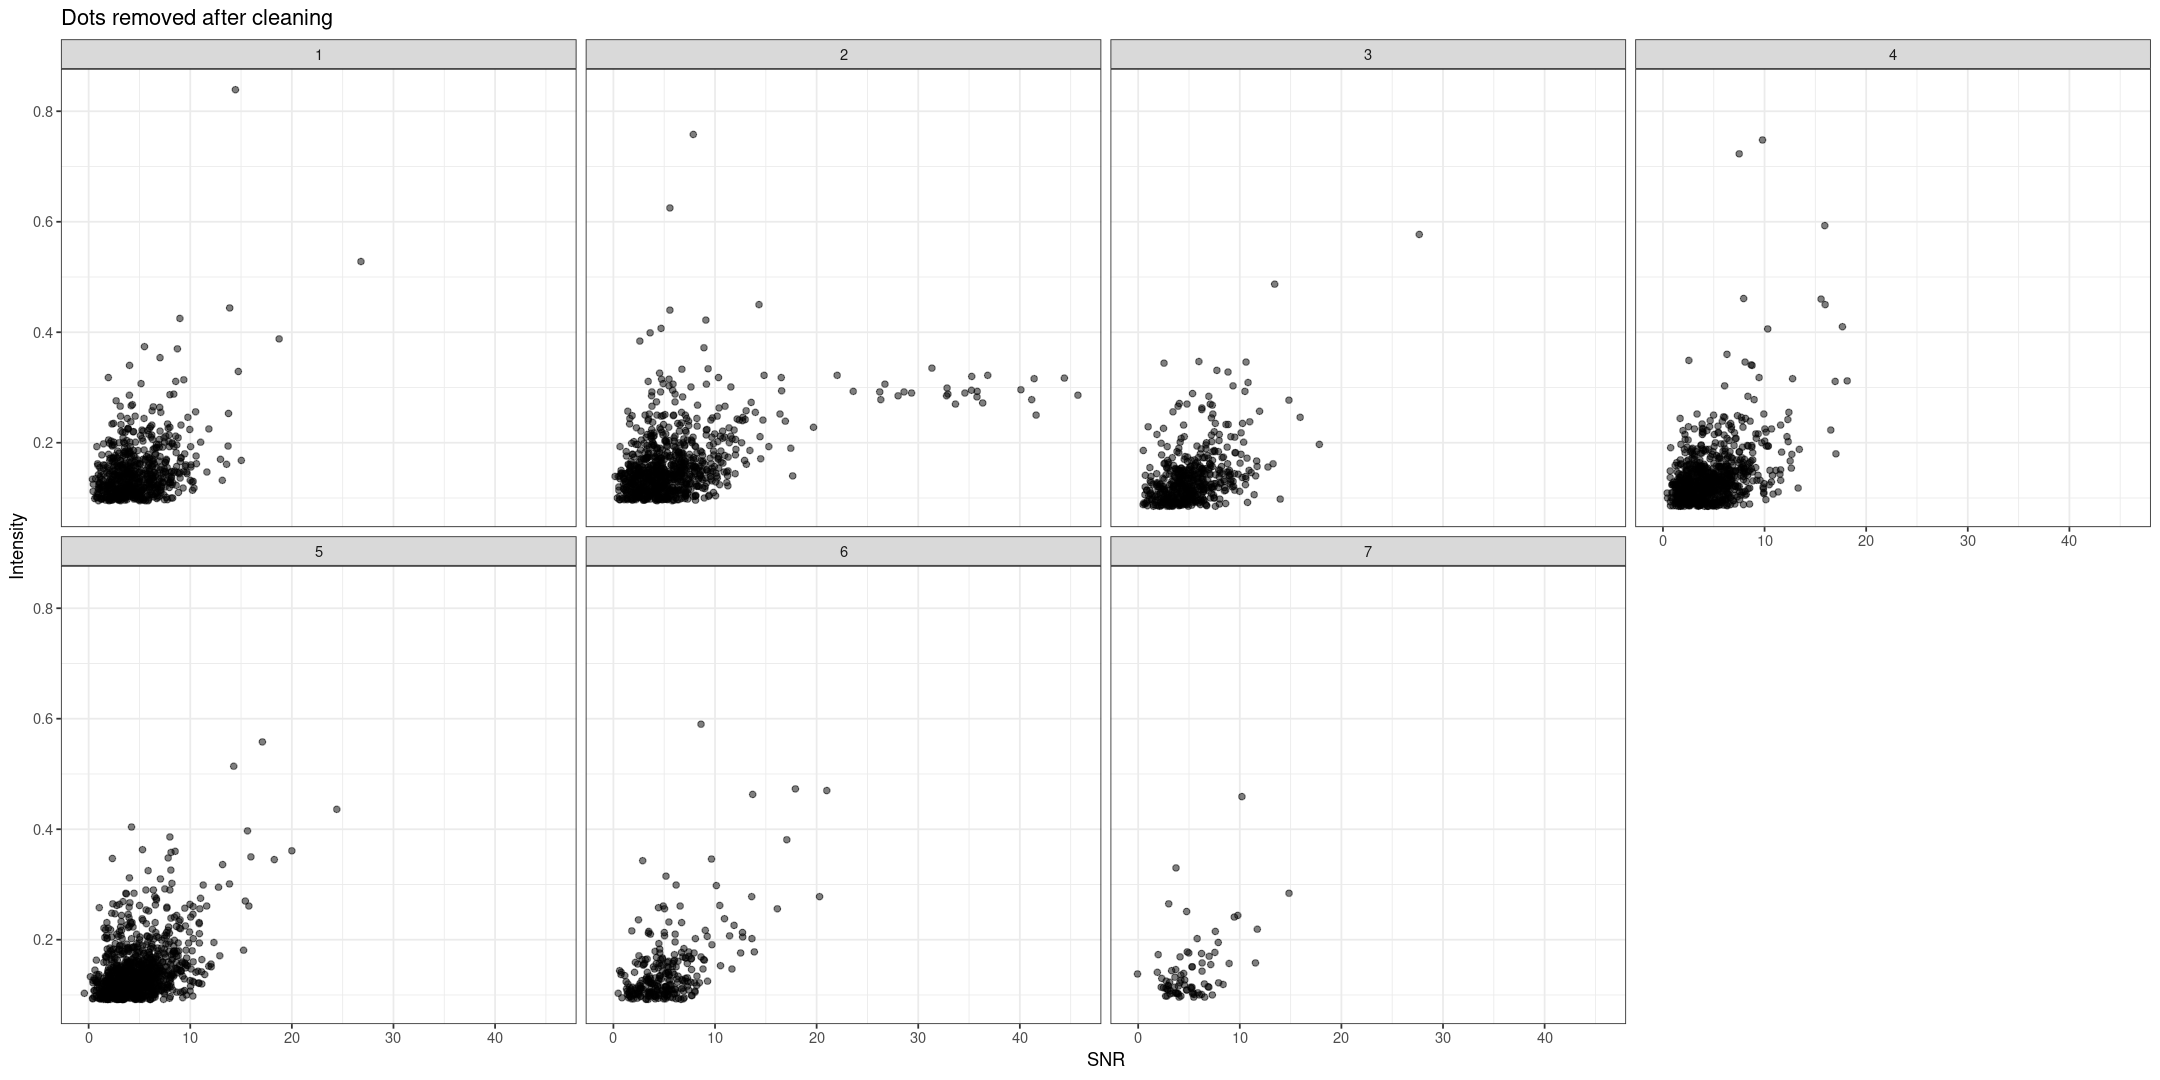

In [36]:
ggplot(pdata[is.na(clean_SNR)], aes(x=raw_SNR, y=raw_Value)) + geom_point(alpha=.5) +
    facet_wrap(~sid, nrow=2) + scale_color_brewer(palette="Set1") + theme_bw() +
    labs(x="SNR", y="Intensity", title="Dots removed after cleaning") + theme(legend.position="top")

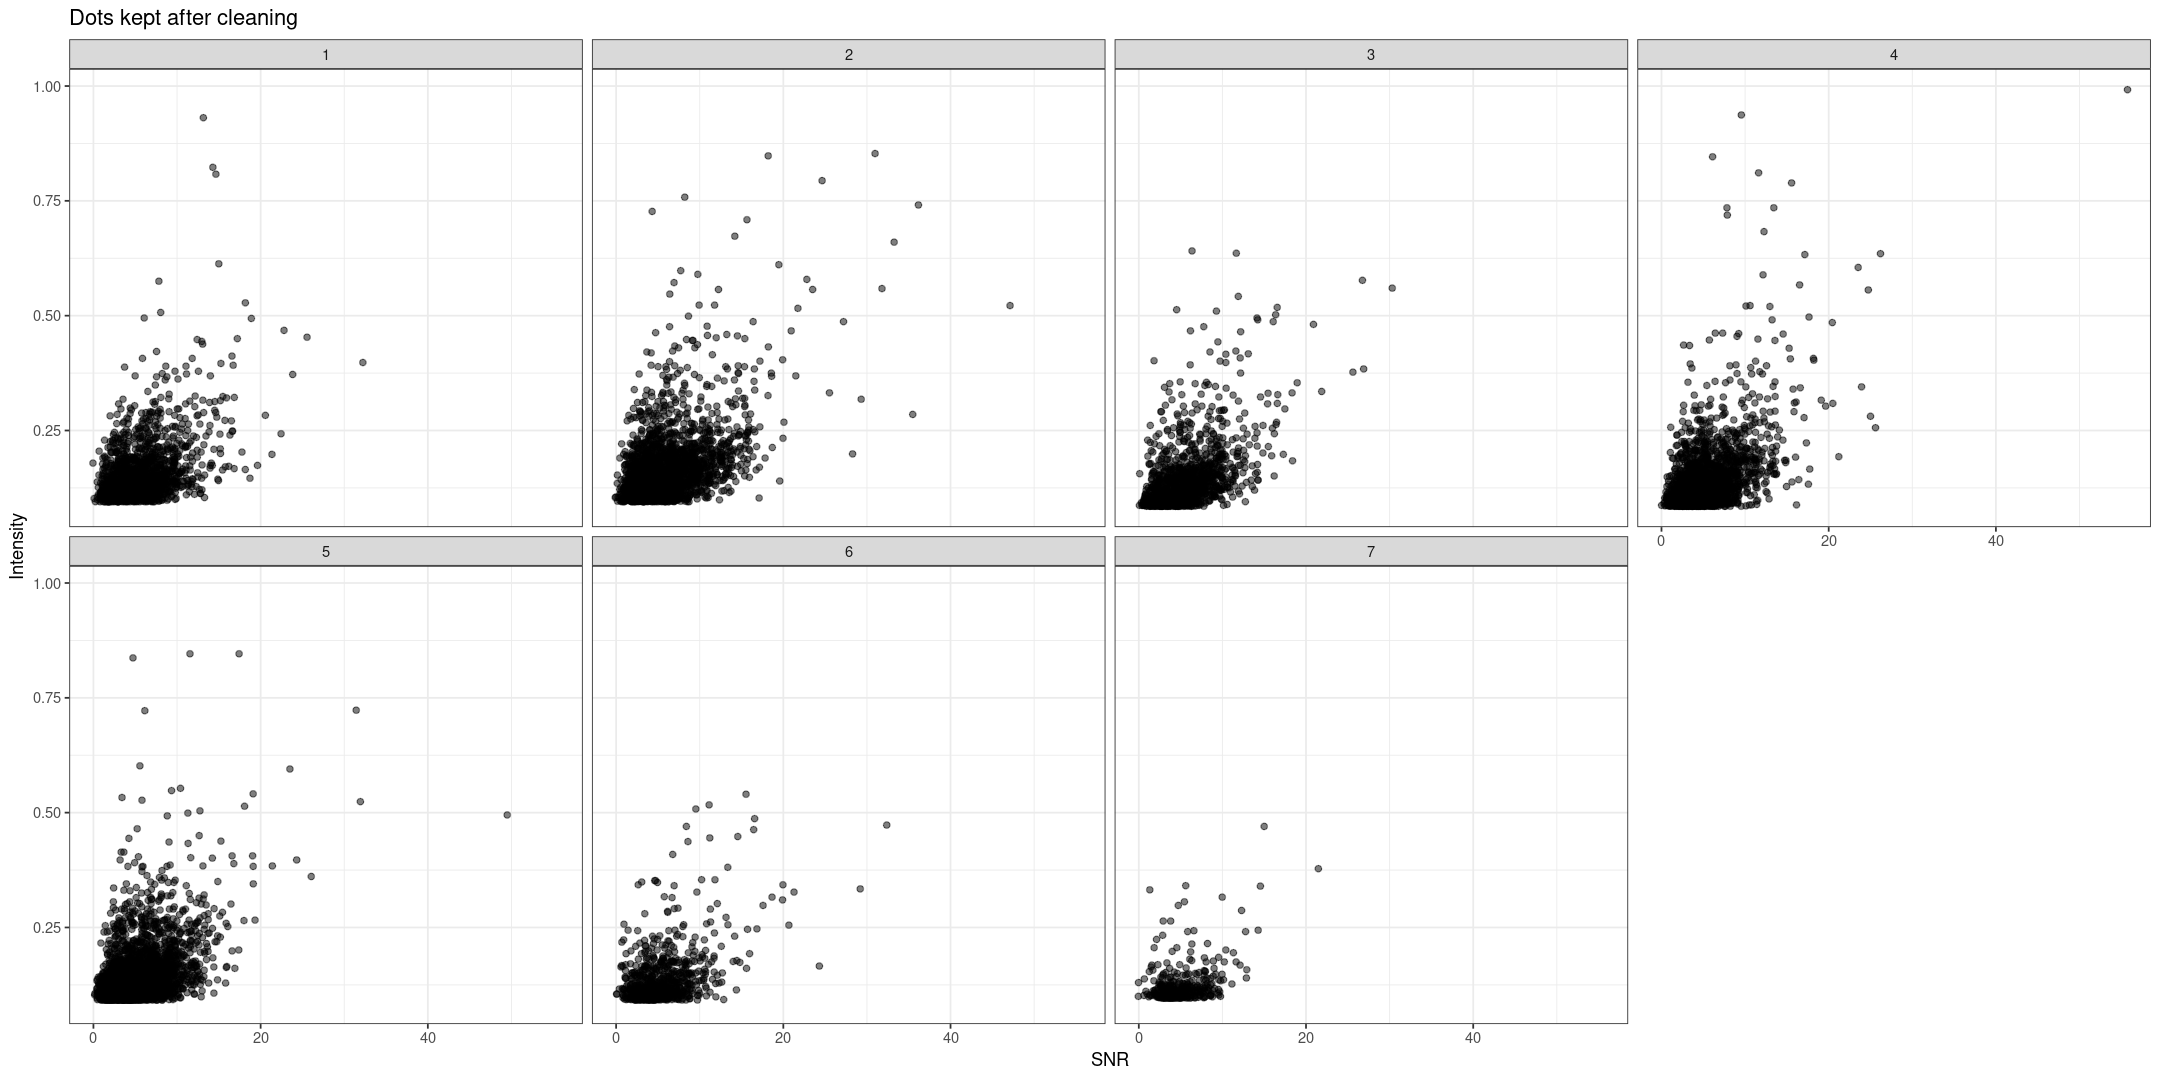

In [37]:
ggplot(pdata[!is.na(clean_SNR)], aes(x=raw_SNR, y=raw_Value)) + geom_point(alpha=.5) +
    facet_wrap(~sid, nrow=2) + scale_color_brewer(palette="Set1") + theme_bw() +
    labs(x="SNR", y="Intensity", title="Dots kept after cleaning") + theme(legend.position="top")

Warning message:
“Removed 4188 rows containing non-finite values (stat_density).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


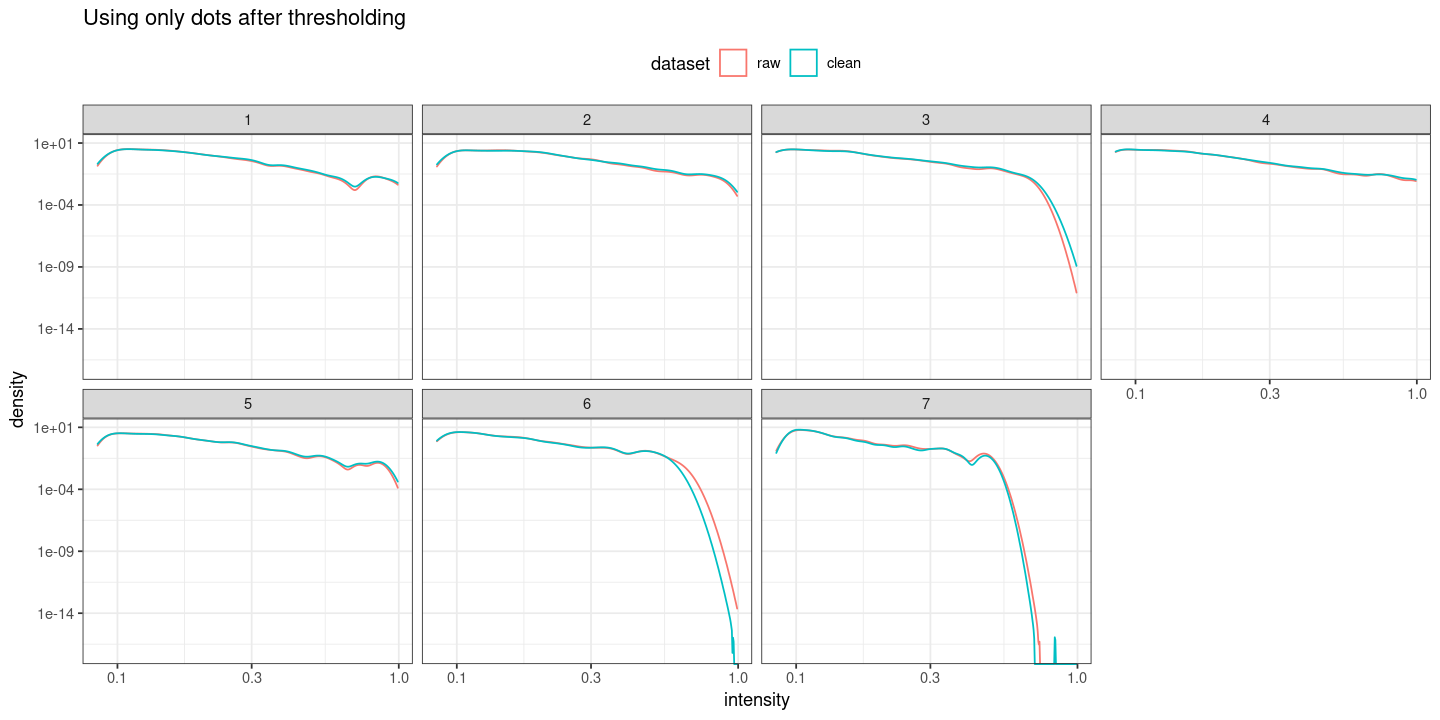

In [51]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(melt(pdata[, .(sid, raw=raw_Value, clean=clean_Value)], id.vars="sid"), aes(x=value, color=variable)) +
    geom_density() + scale_x_log10() + scale_y_log10() + facet_wrap(~sid, nrow=2) +
    theme_bw() + theme(legend.position="top") + labs(color="dataset", x="intensity", title="Using only dots after thresholding")

In [52]:
dots_data = readRDS(file.path("/mnt/data/Imaging/202105-Deconwolf/data_210726", "dots_data.rds"))

In [53]:
dots_data2 = dots_data[is.finite(SNR2) & SNR2 > 0 & Value2 > 0]

In [54]:
thr_table = fread("../../data/magnifications_matching/intensity_thresholds.by_field.tsv")

In [60]:
dots_data3 = dots_data2[magnification == "20x" & image_type == "raw"]
head(dots_data3)

series_id,scaling,magnification,image_type,Channel,Nuclei,x,y,z,Value,FWHM,SNR,NSNR,Label,SNR2,nid,Value2
<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,20x,raw,a647,0,404.044,15.908,56.020,0.931,3.925,13.147,-1,0,6.448689,94,0.931
1,1,20x,raw,a647,0,153.128,104.060,54.058,0.894,2.246,15.519,-1,0,17.100950,0,0.894
1,1,20x,raw,a647,0,402.026,9.968,51.683,0.848,-1.000,3.527,-1,0,4.221072,0,0.848
1,1,20x,raw,a647,0,401.943,10.005,54.238,0.848,-1.000,3.509,-1,0,3.944576,0,0.848
1,1,20x,raw,a647,0,404.125,17.037,52.854,0.839,3.766,14.446,-1,0,6.438891,94,0.839
1,1,20x,raw,a647,0,404.000,17.027,59.180,0.823,4.148,14.284,-1,0,9.761700,94,0.823


In [61]:
thr_table2 = thr_table[image_type == "raw"]
head(thr_table2)

image_type,magnification,sid,thr
<chr>,<chr>,<int>,<dbl>
raw,20x,1,0.095
raw,20x,2,0.095
raw,20x,3,0.085
raw,20x,4,0.085
raw,20x,5,0.092
raw,20x,6,0.092


In [65]:
previously_filtered_dots = rbindlist(by(dots_data3, dots_data3$series_id, function(field_data, thr_data) {
    field_id = field_data[1, series_id]
    threshold = thr_data[sid == field_id, thr]
    field_data[Value2 < threshold]
}, thr_table2))

In [66]:
head(previously_filtered_dots)

series_id,scaling,magnification,image_type,Channel,Nuclei,x,y,z,Value,FWHM,SNR,NSNR,Label,SNR2,nid,Value2
<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,20x,raw,a647,100,362.903,416.063,54.943,0.094,1.942,1.674,1.022,0,1.8179071,99,0.094
1,1,20x,raw,a647,0,203.921,565.027,53.022,0.094,1.907,4.605,-1.000,0,4.8846888,0,0.094
1,1,20x,raw,a647,0,265.976,54.129,57.789,0.094,6.279,3.273,-1.000,0,2.2006581,0,0.094
1,1,20x,raw,a647,0,550.206,372.070,49.990,0.094,6.272,2.868,-1.000,0,1.3480458,141,0.094
1,1,20x,raw,a647,0,626.034,454.915,51.953,0.094,3.274,1.869,-1.000,0,0.9202785,169,0.094
1,1,20x,raw,a647,97,32.033,383.030,47.983,0.094,8.994,2.575,1.000,0,2.6845992,17,0.094


In [67]:
head(data_clean)

level_0,index,sid,nid,size,dilated_size,scaling,magnification,image_type,Channel,⋯,x,y,z,Value,FWHM,SNR,NSNR,Label,SNR2,Value2
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
0,0,1,94,3970,7457,1,20x,raw,a647,⋯,404.044,15.908,56.020,0.931,3.925,13.147,-1.000,0,6.448689,0.931
2,2,1,94,3970,7457,1,20x,raw,a647,⋯,404.000,17.027,59.180,0.823,4.148,14.284,-1.000,0,9.761700,0.823
3,3,1,111,5754,12212,1,20x,raw,a647,⋯,413.027,579.941,53.188,0.808,2.856,14.646,-1.000,0,15.489744,0.808
4,4,1,84,7434,14410,1,20x,raw,a647,⋯,320.987,49.980,55.004,0.613,1.729,14.993,1.658,0,10.577747,0.613
5,5,1,7,8570,15948,1,20x,raw,a647,⋯,80.956,257.054,55.239,0.575,2.589,7.825,-1.000,0,6.928869,0.575
6,6,1,121,2886,5255,1,20x,raw,a647,⋯,518.047,383.048,47.777,0.528,2.062,18.171,-1.000,0,22.886423,0.528


In [69]:
pdata = rbindlist(list(
    previously_filtered_dots[, .(sid=series_id, SNR2, Value2)],
    data_clean[,               .(sid=sid,       SNR2, Value2)]
))

In [74]:
thr_table2

image_type,magnification,sid,thr
<chr>,<chr>,<int>,<dbl>
raw,20x,1,0.095
raw,20x,2,0.095
raw,20x,3,0.085
raw,20x,4,0.085
raw,20x,5,0.092
raw,20x,6,0.092
raw,20x,7,0.096


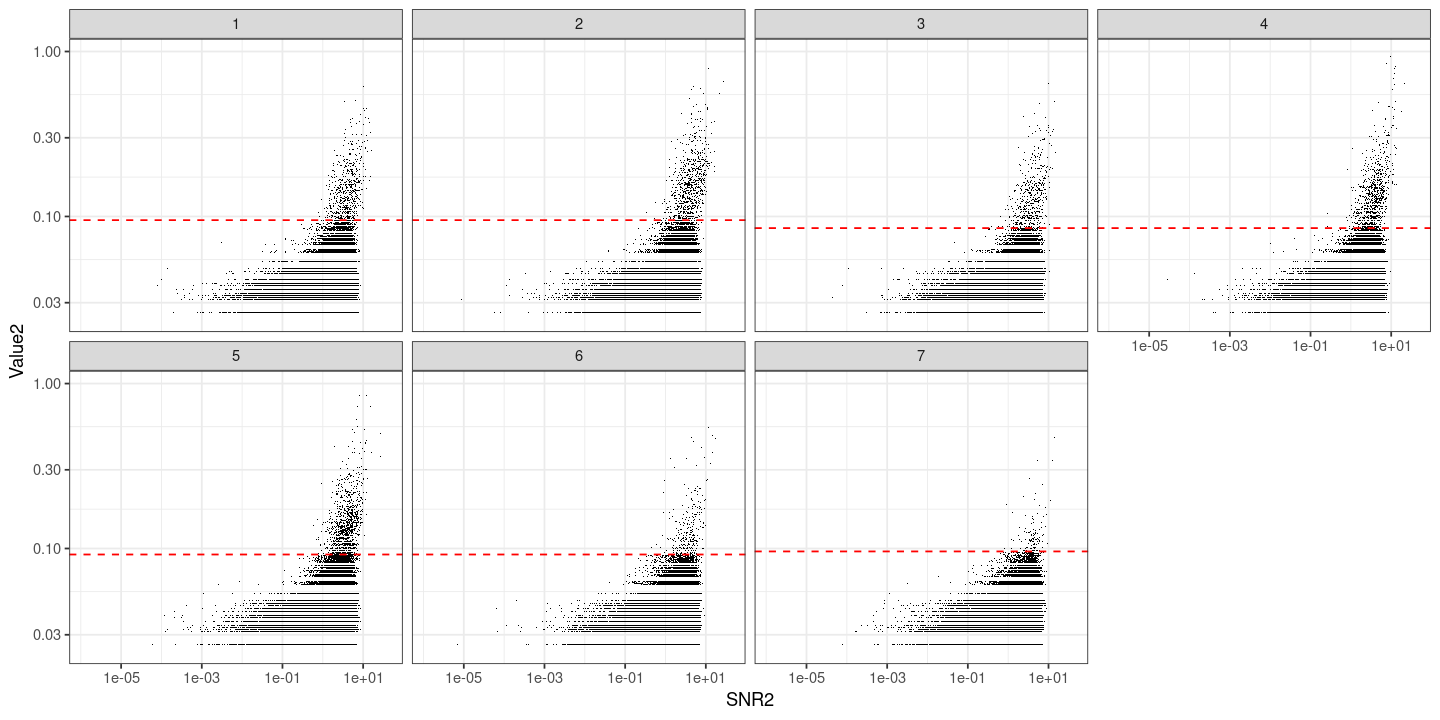

In [76]:
ggplot(pdata) + geom_scattermore(aes(x=SNR2, y=Value2)) +
    geom_hline(data=thr_table2, aes(yintercept=thr), color="red", linetype="dashed") +
    facet_wrap(~sid, nrow=2) + scale_x_log10() + scale_y_log10() + theme_bw()

Warning message:
“Transformation introduced infinite values in continuous y-axis”


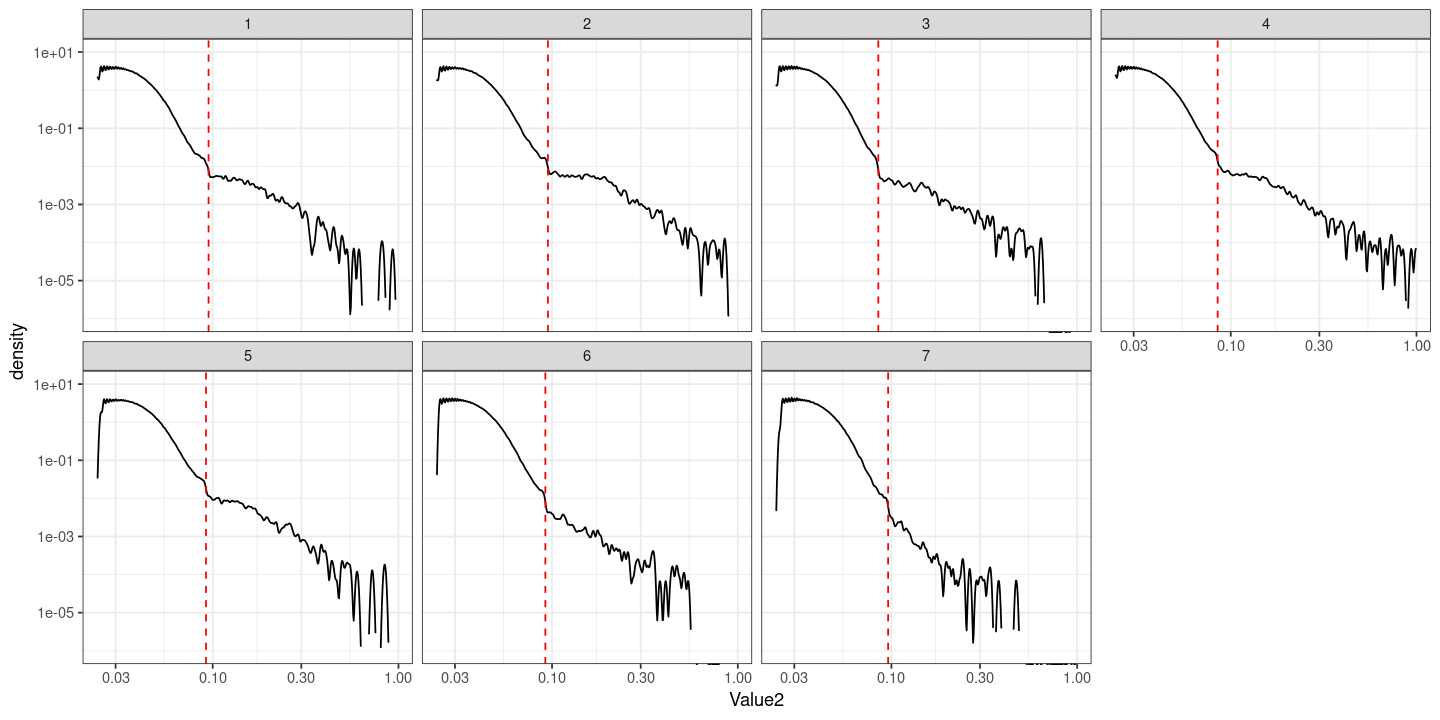

In [79]:
ggplot(pdata) + geom_density(aes(x=Value2)) +
    geom_vline(data=thr_table2, aes(xintercept=thr), color="red", linetype="dashed") +
    facet_wrap(~sid, nrow=2) + scale_x_log10() + scale_y_log10(limits=c(1e-6, 1e1)) + theme_bw()